In [613]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [614]:
df=pd.read_csv('E0 (1).csv')
df2 = pd.read_csv('E0 (2).csv')
df3 =pd.read_csv('E0 (3).csv')
df4 = pd.read_csv('E0 (4).csv')
df5 = pd.read_csv('E0 (5).csv')

In [615]:
new_df = df.append(df2)
new_df = new_df.append(df3)
new_df = new_df.append(df4)
new_df = new_df.append(df5)

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [616]:
new_df = new_df[['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'PSH', 'PSD', 'PSA' ]]

new_df.drop(columns = 'Div', inplace = True)

In [617]:
new_df2 = new_df.copy()

new_df['Team'] = new_df.HomeTeam
new_df['Opponent'] = new_df.AwayTeam

new_df2['Team'] = new_df.AwayTeam
new_df2['Opponent'] = new_df.HomeTeam

df3 = pd.concat([new_df, new_df2])

In [618]:
def home_away_numerical(df):
    """
    Simple function to assign a numerical value to whether a team is home/away. In this case, home=1 away=0. Same methodology
    as above, chunk list to pd.concat().
    """
    team_list = df.HomeTeam.unique()
    chunks = []
    for team in team_list:
        all_games = df[df['Team']==team]
        all_games['HomeAway'] = 1
        all_games.loc[all_games['AwayTeam']==team,'HomeAway'] = 0
        chunks.append(all_games)
    dataframe = pd.concat(chunks,ignore_index=True)
    return dataframe


In [619]:
df3 = home_away_numerical(df3) # generates home dummy variable for home or away

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [620]:
df4 = df3[['Team', 'Opponent', 'HomeAway', 'Date',  'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee','HST', 'AST', 'HC',
       'AC', 'HR', 'AR', 'PSH', 'PSD', 'PSA', ]].copy()

In [621]:
team_list = new_df.HomeTeam.unique()
team_list = team_list.tolist()

list_of_hthg = []
for team in team_list:
    dfnew = df4.loc[(df4.Team==team) & (df4.HomeAway == 1)]['HTHG'].mean()
    list_of_hthg.append(dfnew)
    
team_list = df4.Team.unique()
team_list = team_list.tolist()
 
average_hthg = dict(zip(team_list, list_of_hthg))

list_of_htag = []
for team in team_list:
    dfnew = df4.loc[(df4.Team==team) & (df4.HomeAway == 0)]['HTAG'].mean()
    list_of_htag.append(dfnew)
    
team_list = df4.Team.unique()
team_list = team_list.tolist()
 
average_htag = dict(zip(team_list, list_of_htag))

list_of_fthg = []
for team in team_list:
    dfnew = df4.loc[(df4.Team==team) & (df4.HomeAway == 1)]['FTHG'].mean()
    list_of_fthg.append(dfnew)
    
team_list = df4.Team.unique()
team_list = team_list.tolist()
 
average_fthg = dict(zip(team_list, list_of_fthg))

list_of_ftag = []
for team in team_list:
    dfnew = df4.loc[(df4.Team==team) & (df4.HomeAway == 0)]['FTAG'].mean()
    list_of_ftag.append(dfnew)
    
team_list = df4.Team.unique()
team_list = team_list.tolist()
 
average_ftag = dict(zip(team_list, list_of_ftag))

list_of_hst = []
for team in team_list:
    dfnew = df4.loc[(df4.Team==team) & (df4.HomeAway == 1)]['HST'].mean()
    list_of_hst.append(dfnew)
    
team_list = df4.Team.unique()
team_list = team_list.tolist()
 
average_hst = dict(zip(team_list, list_of_hst))

list_of_ast = []
for team in team_list:
    dfnew = df4.loc[(df4.Team==team) & (df4.HomeAway == 0)]['AST'].mean()
    list_of_ast.append(dfnew)
    
team_list = df4.Team.unique()
team_list = team_list.tolist()
 
average_ast = dict(zip(team_list, list_of_ast))

list_of_hc = []
for team in team_list:
    dfnew = df4.loc[(df4.Team==team) & (df4.HomeAway == 1)]['HC'].mean()
    list_of_hc.append(dfnew)
    
team_list = df4.Team.unique()
team_list = team_list.tolist()
 
average_hc = dict(zip(team_list, list_of_hc))

list_of_ac = []
for team in team_list:
    dfnew = df4.loc[(df4.Team==team) & (df4.HomeAway == 0)]['AC'].mean()
    list_of_ac.append(dfnew)
    
team_list = df4.Team.unique()
team_list = team_list.tolist()
 
average_ac = dict(zip(team_list, list_of_ac))

list_of_hr = []
for team in team_list:
    dfnew = df4.loc[(df4.Team==team) & (df4.HomeAway == 1)]['HR'].mean()
    list_of_hr.append(dfnew)
    
team_list = df4.Team.unique()
team_list = team_list.tolist()
 
average_hr = dict(zip(team_list, list_of_hr))

list_of_ar = []
for team in team_list:
    dfnew = df4.loc[(df4.Team==team) & (df4.HomeAway == 0)]['AR'].mean()
    list_of_ar.append(dfnew)
    
team_list = df4.Team.unique()
team_list = team_list.tolist()
 
average_ar = dict(zip(team_list, list_of_ar))

In [622]:
new_df.Date = pd.to_datetime(new_df.Date, infer_datetime_format=True)
df_final =  new_df.sort_values(by='Date', ascending = True) 

In [623]:
df_final.shape

(1670, 27)

In [624]:
df_final['average_halftimehomegoals'] = df_final['HomeTeam'].map(average_hthg)
df_final['average_halftimeawaygoals'] = df_final['AwayTeam'].map(average_htag)
df_final['average_fulltimehomegoals'] = df_final['HomeTeam'].map(average_fthg)
df_final['average_fulltimeawaygoals'] = df_final['AwayTeam'].map(average_ftag)
df_final['average_hometeamshotsontarget'] = df_final['HomeTeam'].map(average_hst)
df_final['average_awayteamshotsontarget'] = df_final['AwayTeam'].map(average_ast)
df_final['average_homecorners'] = df_final['HomeTeam'].map(average_hc)
df_final['average_awaycorners'] = df_final['AwayTeam'].map(average_ac)
df_final['average_homereds'] = df_final['HomeTeam'].map(average_hr)
df_final['average_awayreds'] = df_final['AwayTeam'].map(average_ar)

In [625]:
df_final.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'PSH', 'PSD', 'PSA', 'Team', 'Opponent',
       'average_halftimehomegoals', 'average_halftimeawaygoals',
       'average_fulltimehomegoals', 'average_fulltimeawaygoals',
       'average_hometeamshotsontarget', 'average_awayteamshotsontarget',
       'average_homecorners', 'average_awaycorners', 'average_homereds',
       'average_awayreds'],
      dtype='object')

In [626]:
df_final['avg_half_timegoals_homevsawayratio'] = df_final['average_halftimehomegoals']/df_final['average_halftimeawaygoals'] 


df_final['avg_full_timegoals_homevsawayratio'] = df_final['average_fulltimehomegoals']/df_final['average_fulltimeawaygoals'] 

df_final['avg_full_timeshotsontarget_homevsawayratio'] = df_final['average_hometeamshotsontarget']/df_final['average_awayteamshotsontarget']
df_final['avg_corners_homevsawayratio'] = df_final['average_homecorners']/df_final['average_awaycorners'] 
df_final['avg_reds_homevsawayratio'] = df_final['average_homereds']/df_final['average_awayreds'] 


In [627]:
df_final.set_index('Date', inplace = True)

In [628]:
df_final.reset_index()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,...,average_awayteamshotsontarget,average_homecorners,average_awaycorners,average_homereds,average_awayreds,avg_half_timegoals_homevsawayratio,avg_full_timegoals_homevsawayratio,avg_full_timeshotsontarget_homevsawayratio,avg_corners_homevsawayratio,avg_reds_homevsawayratio
0,2015-01-11,Everton,Sunderland,6,2,H,2,1,H,A Marriner,...,3.315789,5.963855,3.552632,0.036145,0.078947,1.962134,1.722892,1.417097,1.678715,0.457831
1,2015-01-11,Southampton,Bournemouth,2,0,H,2,0,H,C Pawson,...,3.750000,5.726190,5.166667,0.107143,0.035714,1.020000,1.166667,1.215873,1.108295,3.000000
2,2015-02-11,Tottenham,Aston Villa,3,1,H,2,0,H,M Dean,...,3.370370,7.036145,4.037037,0.012048,0.111111,2.602410,2.212048,1.955382,1.742898,0.108434
3,2015-03-10,Crystal Palace,West Brom,2,0,H,0,0,D,J Moss,...,2.543860,6.107143,4.105263,0.035714,0.035088,1.583333,1.645536,1.670690,1.487637,1.017857
4,2015-03-10,Chelsea,Southampton,1,3,A,1,1,D,R Madley,...,4.060241,6.880952,5.192771,0.071429,0.072289,1.924185,1.896689,1.507065,1.325102,0.988095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1665,2019-12-05,Crystal Palace,Bournemouth,5,3,H,3,1,H,R East,...,3.750000,6.107143,5.166667,0.035714,0.035714,0.840000,1.010417,1.133333,1.182028,1.000000
1666,2019-12-05,Burnley,Arsenal,1,3,A,0,0,D,M Dean,...,4.421687,4.600000,4.915663,0.000000,0.072289,0.874929,0.766154,0.814169,0.935784,0.000000
1667,2019-12-05,Brighton,Man City,1,4,A,1,2,A,M Oliver,...,5.714286,4.822222,6.928571,0.088889,0.023810,0.450575,0.575194,0.587222,0.695991,3.733333
1668,2019-12-05,Man United,Cardiff,0,2,A,0,1,A,J Moss,...,3.052632,6.333333,3.842105,0.023810,0.052632,4.976190,2.418498,1.774425,1.648402,0.452381


In [629]:
df_final['hometeampreviousyearleagueposition'] = 0

In [630]:
league1415 = pd.read_csv('14:15league-table.csv')
league1516 = pd.read_csv('15:16league-table.csv')
league1617 = pd.read_csv('16:17league-table.csv')
league1718 = pd.read_csv('17:18league-table.csv')
league1819 = pd.read_csv('18:19league-table.csv')

In [631]:
list_of_leagues = [league1415,
league1516,
league1617,
league1718,
league1819]

In [632]:
def convert_to_dict(standings):
    league = standings[['Position', 'Team']]
    league = dict(zip(leage.Team, leage.Position))
    return league

In [633]:
convert_to_dict(league1415)

{'Liverpool': 1,
 'Manchester City': 2,
 'Leicester City': 3,
 'Chelsea': 4,
 'Manchester United': 5,
 'Wolverhampton Wanderers': 6,
 'Sheffield United': 7,
 'Tottenham Hotspur': 8,
 'Arsenal': 9,
 'Burnley': 10,
 'Crystal Palace': 11,
 'Everton': 12,
 'Newcastle United': 13,
 'Southampton': 14,
 'Brighton & Hove Albion': 15,
 'West Ham United': 16,
 'Watford': 17,
 'AFC Bournemouth': 18,
 'Aston Villa': 19,
 'Norwich City': 20}

In [634]:

for league in list_of_leages:
    league = leage[['Position', 'Team']]
    league = dict(zip(leage.Team, leage.Position))

In [635]:
df_final = df_final.reset_index()

In [636]:
df_final = df_final.sort_values(by='Date')

In [637]:
df_final.loc[(df_final['Date'] >= '2015-08-08') & (df_final['Date'] <= '2016-05-17'),
             'hometeampreviousyearleagueposition'] = df_final['HomeTeam'].map(convert_to_dict(league1415))
df_final.loc[(df_final['Date'] >= '2016-08-12') & (df_final['Date'] <= '2017-05-22'),
             'hometeampreviousyearleagueposition'] = df_final['HomeTeam'].map(convert_to_dict(league1516))
df_final.loc[(df_final['Date'] >= '2017-08-11') & (df_final['Date'] <= '2018-05-13'),
             'hometeampreviousyearleagueposition'] = df_final['HomeTeam'].map(convert_to_dict(league1617))
df_final.loc[(df_final['Date'] >= '2018-08-10') & (df_final['Date'] <= '2019-05-12'),
             'hometeampreviousyearleagueposition'] = df_final['HomeTeam'].map(convert_to_dict(league1718))
df_final.loc[(df_final['Date'] >= '2019-08-09') & (df_final['Date'] <= '2019-12-12'),
             'hometeampreviousyearleagueposition'] = df_final['HomeTeam'].map(convert_to_dict(league1819))

In [638]:
df_final.loc[(df_final['Date'] >= '2015-08-08') & (df_final['Date'] <= '2016-05-17'),
             'awayteampreviousyearleagueposition'] = df_final['AwayTeam'].map(convert_to_dict(league1415))
df_final.loc[(df_final['Date'] >= '2016-08-12') & (df_final['Date'] <= '2017-05-22'),
             'awayteampreviousyearleagueposition'] = df_final['AwayTeam'].map(convert_to_dict(league1516))
df_final.loc[(df_final['Date'] >= '2017-08-11') & (df_final['Date'] <= '2018-05-13'),
             'awayteampreviousyearleagueposition'] = df_final['AwayTeam'].map(convert_to_dict(league1617))
df_final.loc[(df_final['Date'] >= '2018-08-10') & (df_final['Date'] <= '2019-05-12'),
             'awayteampreviousyearleagueposition'] = df_final['AwayTeam'].map(convert_to_dict(league1718))
df_final.loc[(df_final['Date'] >= '2019-08-09') & (df_final['Date'] <= '2019-12-12'),
             'awayteampreviousyearleagueposition'] = df_final['AwayTeam'].map(convert_to_dict(league1819))

In [639]:
df_final.hometeampreviousyearleagueposition.fillna(22, inplace = True)
df_final.awayteampreviousyearleagueposition.fillna(22, inplace = True)
df_final.dropna(inplace = True)

In [640]:
df_final['homevsaway_standingsratio'] = df_final['hometeampreviousyearleagueposition']/df_final['awayteampreviousyearleagueposition']

In [641]:
df_final.columns

Index(['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 'HTAG',
       'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC', 'AC',
       'HY', 'AY', 'HR', 'AR', 'PSH', 'PSD', 'PSA', 'Team', 'Opponent',
       'average_halftimehomegoals', 'average_halftimeawaygoals',
       'average_fulltimehomegoals', 'average_fulltimeawaygoals',
       'average_hometeamshotsontarget', 'average_awayteamshotsontarget',
       'average_homecorners', 'average_awaycorners', 'average_homereds',
       'average_awayreds', 'avg_half_timegoals_homevsawayratio',
       'avg_full_timegoals_homevsawayratio',
       'avg_full_timeshotsontarget_homevsawayratio',
       'avg_corners_homevsawayratio', 'avg_reds_homevsawayratio',
       'hometeampreviousyearleagueposition',
       'awayteampreviousyearleagueposition', 'homevsaway_standingsratio'],
      dtype='object')

In [642]:
df_odds = df_final[['PSH', 'PSD', 'PSA']]

In [643]:
df_ftr = df_final[['FTR']]

In [644]:
df_dates = df_final[['Date']]

In [645]:
df_teams = df_final[['HomeTeam', 'AwayTeam']]

In [646]:
df_final = df_final[['average_halftimehomegoals', 'average_halftimeawaygoals',
       'average_fulltimehomegoals', 'average_fulltimeawaygoals',
       'average_hometeamshotsontarget', 'average_awayteamshotsontarget',
       'average_homecorners', 'average_awaycorners', 'average_homereds',
       'average_awayreds', 'avg_half_timegoals_homevsawayratio',
       'avg_full_timegoals_homevsawayratio',
       'avg_full_timeshotsontarget_homevsawayratio',
       'avg_corners_homevsawayratio', 'avg_reds_homevsawayratio',
       'hometeampreviousyearleagueposition',
       'awayteampreviousyearleagueposition', 'homevsaway_standingsratio']]

In [647]:
len(df_final)

1669

In [648]:
x_train = df_final[:1289]
x_test = df_final[1289:]
y_train = df_ftr[:1289]
y_test = df_ftr[1289:]

In [649]:
tree = DecisionTreeClassifier()

tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [650]:
tree.score(x_train, y_train)


0.7587276958882855

In [651]:
x_test.loc[(x_test == np.inf).any(axis=1), 'avg_reds_homevsawayratio'] = 15

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [652]:
df1 = x_test[(x_test == np.inf).any(axis=1)]

In [653]:
df1

,average_halftimehomegoals,average_halftimeawaygoals,average_fulltimehomegoals,average_fulltimeawaygoals,average_hometeamshotsontarget,average_awayteamshotsontarget,average_homecorners,average_awaycorners,average_homereds,average_awayreds,avg_half_timegoals_homevsawayratio,avg_full_timegoals_homevsawayratio,avg_full_timeshotsontarget_homevsawayratio,avg_corners_homevsawayratio,avg_reds_homevsawayratio,hometeampreviousyearleagueposition,awayteampreviousyearleagueposition,homevsaway_standingsratio


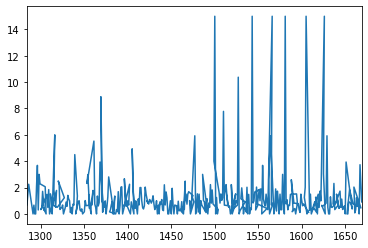

In [654]:
x_test.avg_reds_homevsawayratio.plot()

In [655]:
preds = tree.predict_proba(x_test)

In [656]:
y_test

,FTR
1284,H
1286,A
1291,A
1292,A
1293,A
...,...
1664,A
1665,H
1666,A
1667,A


In [657]:
preds

array([[0.        , 0.        , 1.        ],
       [0.33333333, 0.33333333, 0.33333333],
       [0.        , 0.        , 1.        ],
       ...,
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667]])

In [658]:
accuracy_score(y_test, preds)

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [660]:
tree.classes_


array(['A', 'D', 'H'], dtype=object)

In [661]:
from sklearn.model_selection import GridSearchCV
params = {'max_leaf_nodes': [2,5,10, None], 
 'max_depth': [1, 2, 3, None],
 'min_samples_split': [1.0, 5, 10]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid = params, verbose=1, cv=3)
grid_search_cv.fit(x_train, y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed:    0.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, None],
                         'max_leaf_nodes': [2, 5, 10, None],
                      

In [662]:
print(grid_search_cv.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [663]:
print(grid_search_cv.best_score_)

0.5321955003878976


In [664]:
predictions = grid_search_cv.predict(x_test)

In [665]:
accuracy_score(predictions, y_test)

0.5684210526315789

In [666]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [667]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [668]:
from sklearn.model_selection import RandomizedSearchCV


In [669]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [673]:
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


KeyboardInterrupt: 

In [ ]:
rf_random.best_params_


In [ ]:
rf_random.best_score_

In [ ]:
random_f_predictions = rf_random.predict(x_test)

In [ ]:
accuracy_score(random_f_predictions, y_test)

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 10, 15],
    'max_features': [2, 3, 'sqrt'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [1000, 1500, 2000]}

In [ ]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(x_train, y_train)


In [ ]:
grid_search.best_params_

In [ ]:
rfgridprediction = grid_search.predict(x_test)

In [ ]:
accuracy_score(rfgridprediction, y_test)

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 3, 5],
    'max_features': [1, 2, 3,],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2, 3,],
    'n_estimators': [1500]}

In [ ]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)


In [ ]:
grid_search.best_params_

# {'bootstrap': True,
#  'max_depth': 2,
#  'max_features': 2,
#  'min_samples_leaf': 2,
#  'min_samples_split': 3,
#  'n_estimators': 1500}

In [ ]:
bestrfpredictor = grid_search.predict(x_test)

In [ ]:
accuracy_score(bestrfpredictor, y_test)

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model = XGBClassifier()
model.fit(x_train, y_train)

In [ ]:
basexgbprediction = model.predict(x_test)

In [ ]:
accuracy_score(basexgbprediction, y_test)

In [ ]:
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
xgb_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
grid_search = GridSearchCV(estimator = model, param_grid = params, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
grid_search.best_params_


In [ ]:
xgb1stiter = grid_search.predict(x_test)

In [ ]:
accuracy_score(xgb1stiter, y_test)

In [ ]:
params = {
        'min_child_weight': [10, 20, 30],
        'gamma': [5, 10],
        'subsample': [1.0],
        'colsample_bytree': [0.2, 0.4, 0.6],
        'max_depth': [5, 8, 10]
        }

In [ ]:
grid_search_2 = GridSearchCV(estimator = model, param_grid = params, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
grid_search_2.fit(x_train, y_train)

In [ ]:
grid_search_2.best_params_

In [ ]:
secondxgb = grid_search_2.predict(x_test)

In [ ]:
accuracy_score(secondxgb, y_test)

In [ ]:
grid_search_2.score(x_train, y_train)

In [ ]:
#So far best model is gridsearched random forest. Current params:

# {'bootstrap': True,
#  'max_depth': 2,
#  'max_features': 2,
#  'min_samples_leaf': 2,
#  'min_samples_split': 3,
#  'n_estimators': 1500}

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [1, 2],
    'max_features': [1, 2],
    'min_samples_leaf': [2, 3],
    'min_samples_split': [2, 3, 4],
    'n_estimators': [1300, 1500, 1700]}

In [ ]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)


In [ ]:
grid_search.best_params_

In [ ]:
rf_gs = grid_search.predict(x_test)

In [ ]:
accuracy_score(rf_gs, y_test)

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [2],
    'max_features': [2],
    'min_samples_leaf': [3, 5, 10],
    'min_samples_split': [5],
    'n_estimators': [1350,1400, 1450]}

In [ ]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)

In [ ]:
grid_search.best_params_

# {'bootstrap': True,
#  'max_depth': 2,
#  'max_features': 2,
#  'min_samples_leaf': 5,
#  'min_samples_split': 5,
#  'n_estimators': 1350}


In [674]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [2],
    'max_features': [2],
    'min_samples_leaf': [5],
    'min_samples_split': [5],
    'n_estimators': [1350]}

In [675]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.4s finished
/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/model_selection/_search.py:714: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [676]:
predict = grid_search.predict(x_test)

In [677]:
accuracy_score(predict, y_test)

0.5657894736842105

In [678]:
grid_search.predict_proba(x_test)

array([[0.1478341 , 0.23451735, 0.61764855],
       [0.57031931, 0.2055205 , 0.22416019],
       [0.21420624, 0.2624423 , 0.52335146],
       ...,
       [0.50699672, 0.22887906, 0.26412422],
       [0.5584444 , 0.21267283, 0.22888277],
       [0.35177907, 0.27758644, 0.37063449]])

In [679]:
grid_search.classes_

array(['A', 'D', 'H'], dtype=object)

In [680]:
predictions = pd.DataFrame(grid_search.predict_proba(x_test), columns=grid_search.classes_)


In [ ]:
predictions.to_csv('randomforestpredictions.csv')

In [681]:
x_test

,average_halftimehomegoals,average_halftimeawaygoals,average_fulltimehomegoals,average_fulltimeawaygoals,average_hometeamshotsontarget,average_awayteamshotsontarget,average_homecorners,average_awaycorners,average_homereds,average_awayreds,avg_half_timegoals_homevsawayratio,avg_full_timegoals_homevsawayratio,avg_full_timeshotsontarget_homevsawayratio,avg_corners_homevsawayratio,avg_reds_homevsawayratio,hometeampreviousyearleagueposition,awayteampreviousyearleagueposition,homevsaway_standingsratio
1284,0.722892,0.157895,1.722892,0.684211,4.698795,3.052632,5.963855,3.842105,0.036145,0.052632,4.578313,2.518072,1.539260,1.552236,0.686747,12.0,22.0,0.545455
1286,0.421687,0.771084,1.228916,1.795181,3.963855,5.253012,4.867470,6.132530,0.108434,0.048193,0.546875,0.684564,0.754587,0.793713,2.250000,17.0,1.0,17.000000
1291,0.481481,0.315789,1.481481,0.631579,4.111111,3.078947,5.333333,3.684211,0.000000,0.052632,1.524691,2.345679,1.335233,1.447619,0.000000,22.0,22.0,1.000000
1292,0.638554,0.650602,1.481928,1.566265,4.445783,4.421687,5.698795,4.915663,0.048193,0.072289,0.981481,0.946154,1.005450,1.159314,0.666667,22.0,9.0,2.444444
1293,0.569231,0.446154,1.200000,0.861538,3.600000,3.492308,4.600000,3.938462,0.000000,0.076923,1.275862,1.392857,1.030837,1.167969,0.000000,10.0,22.0,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,0.473684,0.446154,1.157895,0.861538,4.526316,3.492308,5.368421,3.938462,0.052632,0.076923,1.061706,1.343985,1.296082,1.363076,0.684211,22.0,22.0,1.000000
1665,0.500000,0.595238,1.154762,1.142857,4.250000,3.750000,6.107143,5.166667,0.035714,0.035714,0.840000,1.010417,1.133333,1.182028,1.000000,11.0,22.0,0.500000
1666,0.569231,0.650602,1.200000,1.566265,3.600000,4.421687,4.600000,4.915663,0.000000,0.072289,0.874929,0.766154,0.814169,0.935784,0.000000,10.0,9.0,1.111111
1667,0.466667,1.035714,1.177778,2.047619,3.355556,5.714286,4.822222,6.928571,0.088889,0.023810,0.450575,0.575194,0.587222,0.695991,3.733333,22.0,22.0,1.000000


In [682]:
predictions

,A,D,H
0,0.147834,0.234517,0.617649
1,0.570319,0.205520,0.224160
2,0.214206,0.262442,0.523351
3,0.443573,0.251244,0.305183
4,0.256727,0.275154,0.468119
...,...,...,...
375,0.255647,0.277547,0.466806
376,0.351653,0.272024,0.376323
377,0.506997,0.228879,0.264124
378,0.558444,0.212673,0.228883


In [683]:
len(x_test)

380

In [684]:
len(df_odds[1289:])

380

In [685]:
df_teams[1289:]

,HomeTeam,AwayTeam
1284,Everton,Cardiff
1286,Watford,Liverpool
1291,Wolves,Huddersfield
1292,Bournemouth,Arsenal
1293,Burnley,Newcastle
...,...,...
1664,Fulham,Newcastle
1665,Crystal Palace,Bournemouth
1666,Burnley,Arsenal
1667,Brighton,Man City


In [704]:
# analysis_df = pd.concat([df_teams[1289:],df_odds[1289:], y_test, predictions], axis = 1, sort = False)

In [723]:
analysis_df = pd.concat([df_teams[1289:],df_odds[1289:]], axis = 1)

In [724]:
analysis_df = pd.concat([analysis_df, y_test], axis = 1)

In [725]:
# analysis_df = pd.concat([analysis_df, predictions], axis = 1)

In [726]:
analysis_df['impliedhomechance'] = list(predictions['H'])
analysis_df['impliedawaychance'] = list(predictions['A'])
analysis_df['implieddrawchance'] = list(predictions['D'])

In [727]:
analysis_df = pd.concat([analysis_df, df_dates[1289:]], axis = 1)

In [ ]:
# analysis_df.drop(['impliedhomeodds','impliedawayodds','implieddrawodds', 'Date'], axis = 1, inplace = True)

In [728]:
analysis_df['resultprediction'] = predict

In [729]:
analysis_df['Date'] = df_dates[1289:]

In [732]:
analysis_df.to_csv('fullanalysis.csv')

In [737]:
starting_bankroll = 10000

In [770]:
analysis_df.loc[(analysis_df['FTR'] == analysis_df['resultprediction']), 'win?'] = 1
analysis_df.loc[~ (analysis_df['FTR'] == analysis_df['resultprediction']), 'win?'] = 0

In [782]:
analysis_df.to_csv('final_analysis.csv')

In [821]:
analysis_df['odds_taken'] = 0

In [823]:
analysis_df.loc[analysis_df['FTR'] == 'H', 'odds_taken'] = analysis_df['PSH']
analysis_df.loc[analysis_df['FTR'] == 'D', 'odds_taken'] = analysis_df['PSD']
analysis_df.loc[analysis_df['FTR'] == 'A', 'odds_taken'] = analysis_df['PSA']

In [838]:
analysis_df['return'] = (analysis_df['win?'] * analysis_df['odds_taken'] * 100) - 100

In [835]:
analysis_df['return'].replace(0, -100, inplace = True)

In [840]:
analysis_df

,HomeTeam,AwayTeam,PSH,PSD,PSA,FTR,impliedhomechance,impliedawaychance,implieddrawchance,Date,resultprediction,win?,profit/loss,return,odds_taken
1284,Everton,Cardiff,1.43,4.78,8.61,H,0.617649,0.147834,0.234517,2018-11-24,H,1,0,43.0,1.43
1286,Watford,Liverpool,6.31,4.28,1.59,A,0.224160,0.570319,0.205520,2018-11-24,A,1,0,59.0,1.59
1291,Wolves,Huddersfield,1.51,4.16,8.20,A,0.523351,0.214206,0.262442,2018-11-25,H,0,0,-100.0,8.20
1292,Bournemouth,Arsenal,3.53,3.84,2.10,A,0.305183,0.443573,0.251244,2018-11-25,A,1,0,110.0,2.10
1293,Burnley,Newcastle,2.93,3.16,2.77,A,0.468119,0.256727,0.275154,2018-11-26,H,0,0,-100.0,2.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,Fulham,Newcastle,2.55,3.57,2.83,A,0.466806,0.255647,0.277547,2019-12-05,H,0,0,-100.0,2.83
1665,Crystal Palace,Bournemouth,1.88,4.14,3.95,H,0.376323,0.351653,0.272024,2019-12-05,H,1,0,88.0,1.88
1666,Burnley,Arsenal,3.15,3.80,2.25,A,0.264124,0.506997,0.228879,2019-12-05,A,1,0,125.0,2.25
1667,Brighton,Man City,15.63,8.17,1.18,A,0.228883,0.558444,0.212673,2019-12-05,A,1,0,18.0,1.18


In [841]:
sum(analysis_df['return'])

353.0

In [829]:
s = pd.Series([0, 1, 2, 3, 4])
s.replace(0, 5)

In [831]:
analysis_df.loc[analysis_df['return'] == '0', 'return'] = -100

/Users/carterbouley/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [832]:
analysis_df

,HomeTeam,AwayTeam,PSH,PSD,PSA,FTR,impliedhomechance,impliedawaychance,implieddrawchance,Date,resultprediction,win?,profit/loss,return,odds_taken
1284,Everton,Cardiff,1.43,4.78,8.61,H,0.617649,0.147834,0.234517,2018-11-24,H,1,0,143.0,1.43
1286,Watford,Liverpool,6.31,4.28,1.59,A,0.224160,0.570319,0.205520,2018-11-24,A,1,0,159.0,1.59
1291,Wolves,Huddersfield,1.51,4.16,8.20,A,0.523351,0.214206,0.262442,2018-11-25,H,0,0,0.0,8.20
1292,Bournemouth,Arsenal,3.53,3.84,2.10,A,0.305183,0.443573,0.251244,2018-11-25,A,1,0,210.0,2.10
1293,Burnley,Newcastle,2.93,3.16,2.77,A,0.468119,0.256727,0.275154,2018-11-26,H,0,0,0.0,2.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664,Fulham,Newcastle,2.55,3.57,2.83,A,0.466806,0.255647,0.277547,2019-12-05,H,0,0,0.0,2.83
1665,Crystal Palace,Bournemouth,1.88,4.14,3.95,H,0.376323,0.351653,0.272024,2019-12-05,H,1,0,188.0,1.88
1666,Burnley,Arsenal,3.15,3.80,2.25,A,0.264124,0.506997,0.228879,2019-12-05,A,1,0,225.0,2.25
1667,Brighton,Man City,15.63,8.17,1.18,A,0.228883,0.558444,0.212673,2019-12-05,A,1,0,118.0,1.18


In [795]:
analysis_df['return'] = 0

In [ ]:
analysis_df['return'] = [analysis_df['PSH'] if x == 'Z' else 'green' for x in df['win?']]


In [ ]:
conditions = [
    (analysis_df['win?'] == '1') & (analysis_df['FTR'] == 'H'),
    (analysis_df['win?'] == '1') & (analysis_df['FTR'] == 'D'),
    (analysis_df['win?'] == '1') & (analysis_df['FTR'] == 'A')]

In [797]:
for row in analysis_df['return']:
    
    if row == 0:
        
        row = -100
        
    else:
        if analysis_df['FTR'] == 'H':
            row = analysis_df['PSH']*100
        if analysis_df['FTR'] == 'A':
            row = analysis_df['PSA']*100
        if analysis_df['FTR'] == 'D':
            row = analysis_df['PSD']*100

In [789]:
def simple_bettor_strategy(df):
    starting_bankroll = 10000
    total_spend = 0
    
    if df['win?'] == 1:
        
        if df['FTR'] == 'H':
            odds_taken = df['PSH']
        if df['FTR'] == 'A':
            odds_taken = df['PSA']
        if df['FTR'] == 'D':
            odds_taken = df['PSD']
    else:
        pass
    
    return odds_taken
        
    

In [ ]:
result = [f(x) for x in df['col']]


In [790]:
simple_bettor_strategy(analysis_df)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [774]:
len(analysis_df)

380

In [780]:
if analysis_df[0]['win?'] == 1:
        if analysis_df[0]['FTR'] == 'H':
            odds_taken = analysis_df[0]['PSH']

KeyError: 0